# Physics 18L - Experiment 2 - Day 2
### Christian Lee <br/>
  
##### Professor: N. Whitehorn
##### TA: Teresa Le
##### Lab Date: Wednesday Oct 10, 2019
##### UCLA Physics Department <br/>


Required libraries: numpy, matplotlib, scipy, math

This notbook file includes the first three parts of day 2. This code produces a plot of the frequency vs. voltage data from Experiment 1, and calculates a linear best fit. 

For some reason, code producing plots must be run twice in jupyter notebook. 
Run this code cell twice. 

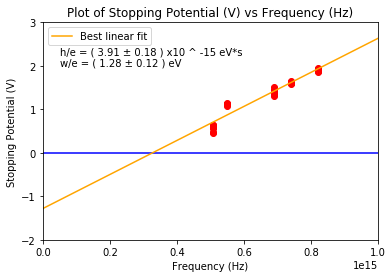

In [2]:
from numpy import loadtxt
from matplotlib import pyplot
from scipy.optimize import curve_fit
from math import sqrt

#Use load text to load and interpret my data, which is titled "fvdata.csv"
fvdata = loadtxt("fvdata.csv", dtype="int, float", delimiter=",", usecols=(0,1),unpack=True)

fdata = list(fvdata[0]) #frequency data
vdata = list(fvdata[1]) #voltage data

def linear_fxn(x, m, b):
	#Must define a linear function to use in the scipy.optimize.curve_fit function
	return m*x + b


popt, pcov = curve_fit(linear_fxn, fdata, vdata)

he_value = round(popt[0], 17) #curve fit h/e value, with 2 sig figs. 
wf_value = round(popt[1], 2) #curve fit work function value, with 2 sig figs. 

#Generate x and y data points to plot best fit line
x = list(range(0, 10**15+1, 10**14))
y = [linear_fxn(i,he_value,wf_value) for i in x]

#Pull uncertainty values from pcov matrix
he_uncertainty = sqrt(pcov[0,0])
wf_uncertainty = sqrt(pcov[1,1])

#Plot everything on the same plot.
pyplot.scatter(fdata, vdata, color = "red")
pyplot.plot([0,10**15],[0,0],"b") #Plot x-axis
pyplot.plot(x,y,color="orange", label="Best linear fit")
pyplot.legend(loc="upper left")
pyplot.title("Plot of Stopping Potential (V) vs Frequency (Hz)")
pyplot.axis([0,10**15, -2,3])
pyplot.xlabel("Frequency (Hz)")
pyplot.ylabel("Stopping Potential (V)")
pyplot.text(0.5*10**14,2,"h/e = ( {} ± {} ) x10 ^ -15 eV*s \nw/e = ( {} ± {} ) eV".format(round(he_value*10**15,2),round(he_uncertainty*10**15,2),abs(round(wf_value,2)),round(wf_uncertainty,2)))
pyplot.show()
